### Uber Data Analsysis With Python

**Uber Technologies, Inc**., commonly known as Uber, is ans American technology company. Its services include ride-hailing, food delivery, package
delivery, couriers, freight tranportation, and through a partnership with Lime, electric bicycle and motorized scooter rental.

But, we will mainly use data regarding **Uber ride** and use **Python** to analyse the data.

We wish to answer the below following questions:
- Check how long do people travel with Uber?
- What Hour Do Most People take Uber To Their Destination?
- Check The purpose of trips
- Which Day has the highest number of trips
- What are the number of trips per each day?
- What are the trips in the month
- The starting points of trips. Where do people start boarding their trip from Most?

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import os

### Loading dataset

In [2]:
df = pd.read_csv("Uber Drives.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
print(df.shape)
df.dtypes

(1156, 7)


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

>There are 6 categorical variables and 1 numerical variable. <br>
Here STAR_DATE and END_DATE are in object type. We need to convert them into datetime variable.

### Check for null values

In [4]:
df.isnull().any() # it will check for column with one or more null values

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

> *So, END_DATE, CATEGORY, START, STOP, PURPOSE column have missing values in it.*

In [5]:
# to check for how many

df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
# to exactly see Null record in END_DATE* column

print(df[df['END_DATE*'].isna()].index)

df[df['END_DATE*'].isna()]

Index([1155], dtype='int64')


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


> As we can see this row contains null value for most of the columns. We will delete it.

In [7]:
# dropping row contaning null value for 'END_DATE*' column, by passing it's index

df.drop(df[df['END_DATE*'].isna()].index, axis = 0, inplace = True)

In [8]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

> *Now, only PURPOSE\* column has missing values.*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Now, only Purpose column has null values and **it is more than 55% of the total**. So I'm dropping this<br> columns and excluding this from this analsysis.**

**# One may try to replace NULL with something and keep Purpose column like shown below**<br>

#filling the null values with a NOT keyword.<br>
**df['PURPOSE'].fillna("NOT", inplace=True)**

**# You may also delete the null value rows and keep this column for analysis like below.**

<span style='background:cyan'> sns.countplot(df['PURPOSE*'], order = df['PURPOSE*'].value_counts().index) </span>

In [10]:
# dropping Purpose column

df.drop(['PURPOSE*'], axis = 1, inplace = True)  # give axis=0, for removing row
df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0


### Checking for duplicate rows

In [11]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


> We will remove this duplicate row.

In [12]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)  # give axis = 1, for removing column

df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


### Converting START_DATE* and END_START* columns data type to date_time format

In [13]:
#df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = '%m/%d%Y %H:%M') # gave error
#df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d%Y %H:%M')

df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = 'mixed')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = 'mixed')

df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

## EDA

### Univariate

### 1. Category

In [14]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

>There are 2 ride-categories:-
> 1. **Business**: For work related & 
> 2. **Personal**: For personal travel

In [15]:
df['CATEGORY*'].value_counts()

CATEGORY*
Business    1077
Personal      77
Name: count, dtype: int64

In [16]:
# to find their each percentage

df['CATEGORY*'].value_counts(normalize=True)

CATEGORY*
Business    0.933276
Personal    0.066724
Name: proportion, dtype: float64

<Axes: xlabel='CATEGORY*', ylabel='count'>

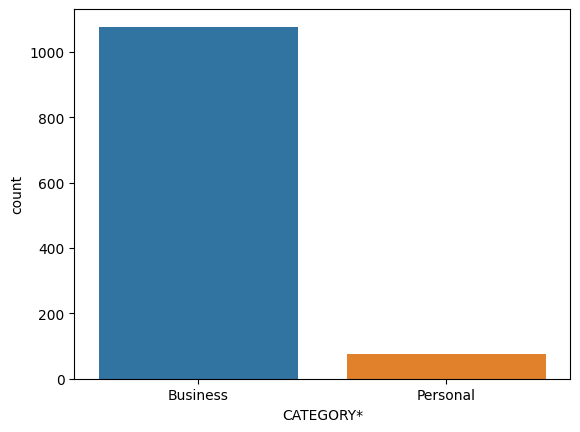

In [17]:
sns.countplot(x = 'CATEGORY*', data = df)

> Most of the Trip is for **Business reason**.

In [18]:
# Total_Miles for each category

df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles =('MILES*','sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

<Figure size 640x480 with 0 Axes>

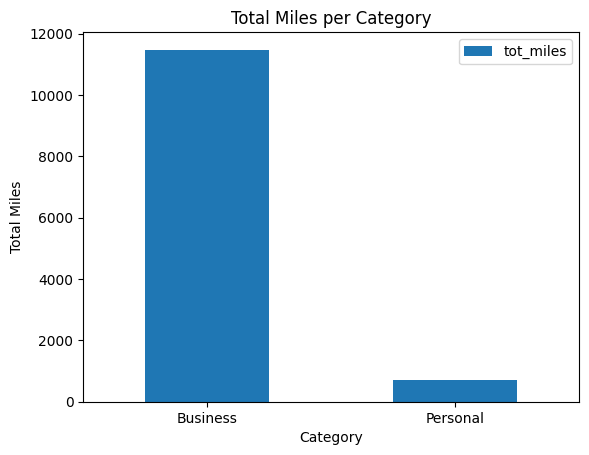

In [19]:
plt.figure()

df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles =('MILES*','sum')).plot(kind='bar')

plt.title('Total Miles per Category')
plt.ylabel('Total Miles')
plt.xlabel('Category')
plt.xticks(rotation = 0)

>**User mainly uses UBER Cars for it's Business purpose.**
>- Around 94% miles was consumed during Business trips.
>- Only 6% miles were consumed during personal trips.

### 2. START*

In [20]:
len(df['START*'].unique())

177

>**There are 177 unique starting points**

In [21]:
# top 5 Start places

df['START*'].value_counts(ascending=False)[:5]

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Pickup places'}, xlabel='Pickup Count', ylabel='Places'>

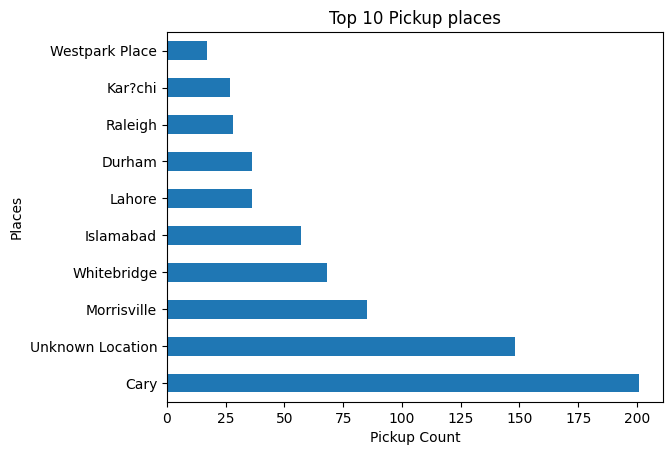

In [22]:
df['START*'].value_counts(ascending=False)[:10].plot(kind='barh',
                                                     ylabel='Places', xlabel='Pickup Count', title='Top 10 Pickup places')

>***Cary is the most popular Starting point for the user.***

### 2. STOP*

In [23]:
len(df['STOP*'].unique())

188

>**There are 188 unique Drop points (destination).**

<Axes: title={'center': 'Top 10 Drop places'}, xlabel='Drop point Count', ylabel='Places'>

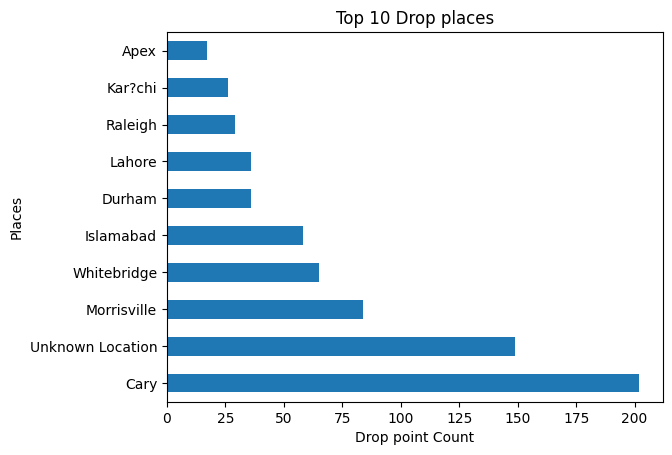

In [24]:
df['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh',
                                                    ylabel='Places', xlabel='Drop point Count', title='Top 10 Drop places')

>-***Cary is the most popular Stop place for the user.<br>***
>-***Maybe users's home is in Cary (as mostly start & stop are from here)***

In [25]:
# How many pick-up location is unknown

df[df['START*'] == 'Unknown Location']['START*'].value_counts()

START*
Unknown Location    148
Name: count, dtype: int64

In [26]:
# How many drop location is unknown

df[df['STOP*'] == 'Unknown Location']['STOP*'].value_counts()

STOP*
Unknown Location    149
Name: count, dtype: int64

### 3. MILES*

<Axes: xlabel='MILES*', ylabel='Count'>

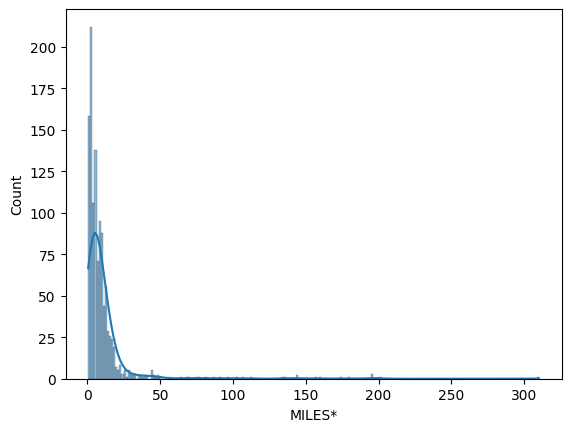

In [27]:
sns.histplot(df['MILES*'], kde=True)

>**Doesn't give any good information.<br>**
>*Expect for that fact that most of the trips is for less than 50 miles.*<br>
>*Miles data is Rightly Skewed.*

In [28]:
df.describe().T  # for getting result in Transpose form

,count,mean,min,25%,50%,75%,max,std
START_DATE*,1154,2016-07-17 00:07:01.611784960,2016-01-01 21:11:00,2016-03-31 20:23:30,2016-07-21 17:29:30,2016-10-27 21:16:15,2016-12-31 22:08:00,NaN
END_DATE*,1154,2016-07-17 00:30:16.117850880,2016-01-01 21:17:00,2016-03-31 20:52:00,2016-07-21 17:37:00,2016-10-27 21:34:30,2016-12-31 23:51:00,NaN
MILES*,1154.0,10.567418,0.5,2.9,6.0,10.4,310.3,21.588452


## Multivariate analysis

In [29]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [30]:
df.groupby(['START*','STOP*'])['MILES*'].apply(print)

910    2.2
Name: (Agnew, Agnew), dtype: float64
906    4.3
Name: (Agnew, Cory), dtype: float64
908    2.2
911    2.4
Name: (Agnew, Renaissance), dtype: float64
879    15.2
Name: (Almond, Bryson City), dtype: float64
646    1.0
825    3.3
Name: (Apex, Apex), dtype: float64
58      5.5
60      5.7
80      5.7
173     5.6
410     7.2
565     5.5
616     4.6
647     6.0
826     5.3
978     5.4
1014    5.3
1033    8.8
1045    4.7
Name: (Apex, Cary), dtype: float64
855    2.2
Name: (Apex, Eagle Rock), dtype: float64
1001    9.0
Name: (Apex, Holly Springs), dtype: float64
469    17.0
Name: (Arabi, Metairie), dtype: float64
621    4.9
Name: (Arlington, Washington), dtype: float64
613    1.3
Name: (Arlington Park at Amberly, Lexington Park at Amberly), dtype: float64
881    195.9
Name: (Asheville, Mebane), dtype: float64
871    91.8
Name: (Asheville, Topton), dtype: float64
232    136.0
Name: (Austin, Katy), dtype: float64
547     8.3
548     3.2
551     4.5
556    13.0
557     4.4
Name: (Banne

START*         STOP*             
Agnew          Agnew                 None
               Cory                  None
               Renaissance           None
Almond         Bryson City           None
Apex           Apex                  None
                                     ... 
Whitebridge    Wayne Ridge           None
               Westpark Place        None
               Whitebridge           None
               Williamsburg Manor    None
Winston Salem  Asheville             None
Name: MILES*, Length: 363, dtype: object

In [31]:
df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

>**Cary-Durham & Cary-Moriisville and vice versa are the farthese distance ride.** 

#### Checking for Round Trip**

In [32]:
def is_roundtrip(df):
    if df['START*'] == df['STOP*']:
        return 'YES'
    else:
        return 'NO'
  
# Adding ROUND_TRIP* column in the dataframe
df['ROUND_TRIP*'] = df.apply(is_roundtrip, axis = 1) # axis = 1 means it is for column

In [33]:
df['ROUND_TRIP*'].value_counts()

ROUND_TRIP*
NO     866
YES    288
Name: count, dtype: int64

<Axes: xlabel='ROUND_TRIP*', ylabel='count'>

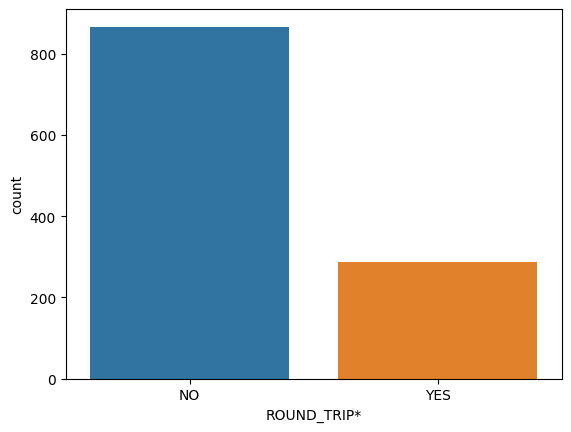

In [34]:
sns.countplot(x='ROUND_TRIP*', data = df, order=df['ROUND_TRIP*'].value_counts().index)

>***Most of the trip is one-way. Only 25% is round-trip.***

<br>

## Answering Some Other Questions

In [35]:
# extracting and adding columns related to date and time that we might need

hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
df['HOUR'] = hour
df['DAY'] = day
df['DAY OF WEEK'] = dayofweek
df['MONTH'] = month
df['WEEKDAY'] = weekday

In [36]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,ROUND_TRIP*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,YES,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,YES,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,YES,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,YES,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO,14,6,2,1,Wednesday


### How long do people travel with UBER?

<Axes: ylabel='Frequency'>

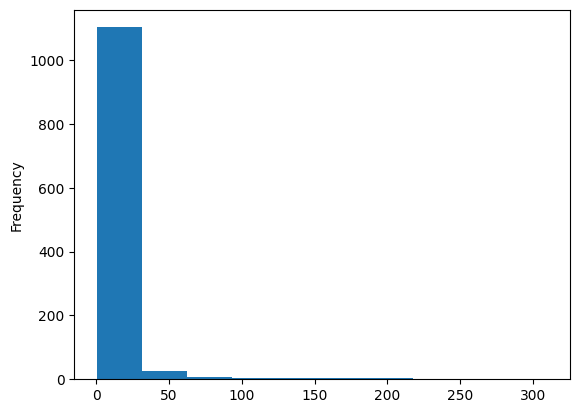

In [37]:
df['MILES*'].plot.hist()

> *Most people book it for short distance. like for 1-50 miles.*

### What hour do most people take UBER to their Destination?

Text(0.5, 1.0, 'Number of Trips Vs Hours')

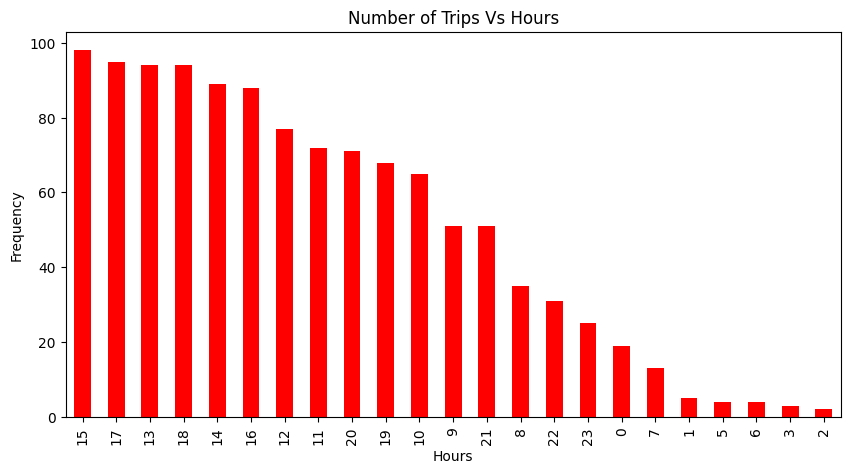

In [38]:
hours = df['START_DATE*'].dt.hour.value_counts()

hours.plot(kind = 'bar', color = 'red', figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Hours')

> *Most of the Trips is at 1:00 PM, 2:00 PM, then 5:00 PM, 3:00 PM. <br>UBER can make use of this information for advertise, target people and offer discount.*

### Check the Purpose of Trips

In [ ]:
# with this info, UBER will know which offer to give, what kind of advertisment to run.

df['PURPOSE*'].value_counts()

In [ ]:
df['PURPOSE*'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'brown')

> *Meeting has the highest Purpose.* <br> **HINT:** For your next meeting, we are offering you 10% discount.

### Which day has the highest Number of Trips

In [39]:
df['WEEKDAY'].value_counts()

WEEKDAY
Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64

<Axes: xlabel='WEEKDAY'>

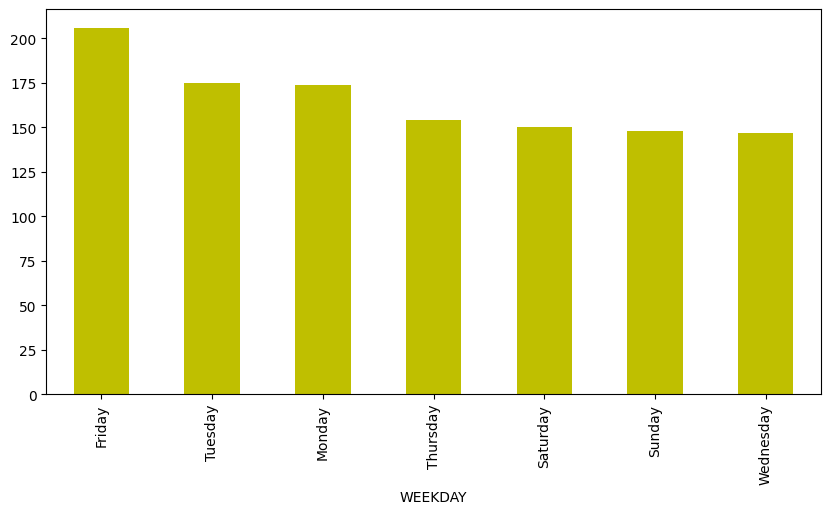

In [40]:
df['WEEKDAY'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'y')

> ***FRIDAY** has the most number of Trip.*

### What are the Number of Trips per Each Day?

<Axes: xlabel='DAY'>

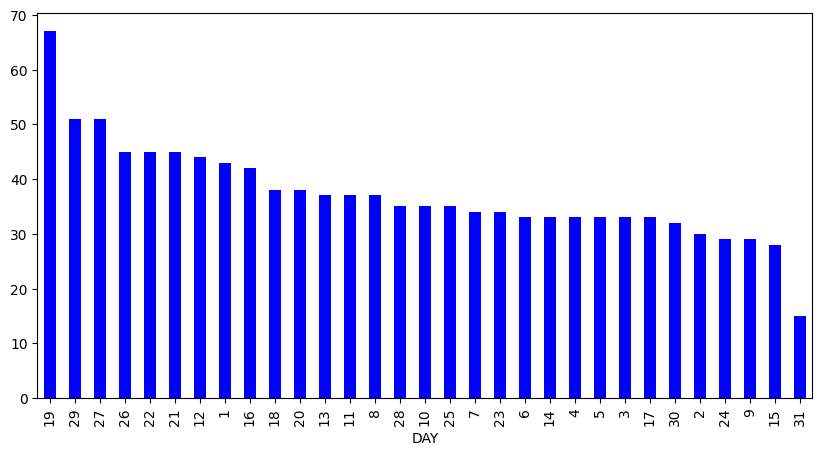

In [41]:
df['DAY'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'blue')


### What Are The Trips In The Month?

<Axes: xlabel='MONTH'>

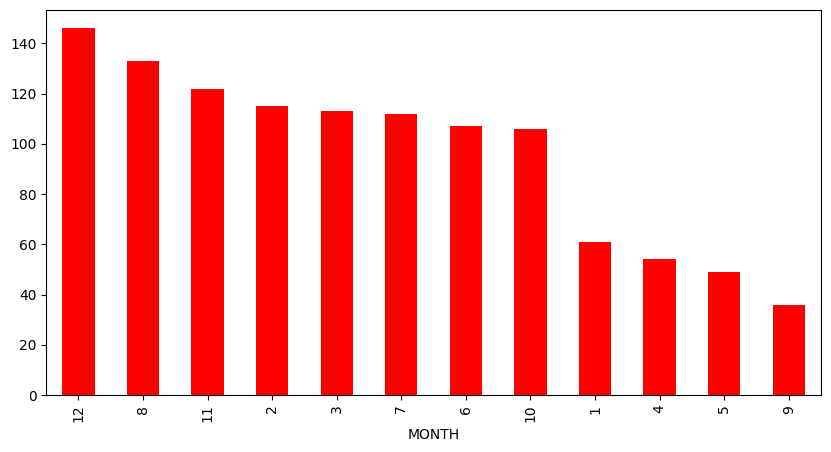

In [42]:
df['MONTH'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'red')

> **December receive the highest booking.**

### The starting points of trips. Where Do People Start Boarding Their Trip From Most?

In [43]:
df['START*'].value_counts()

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64

> **Most people start their trip from Cary.**

<Axes: ylabel='START*'>

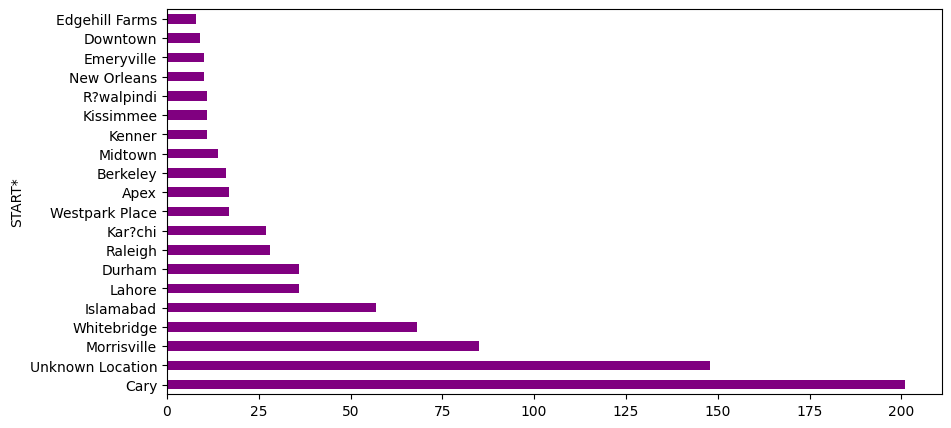

In [44]:
df['START*'].value_counts()[:20].plot(kind = 'barh', figsize = (10, 5), color = 'purple')